必ずランタイプをGPUに変更する

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.2 MB/s eta 0:00:00


In [ ]:
!mkdir -p weights
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WnB8TmknVfu1ZmYz6UFI")
project = rf.workspace("project-vxpkm").project("datasets-r56ha")
version = project.version(4)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to datasets-4 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 5818.20it/s]


In [ ]:
!yolo task=detect mode=train epochs=50 batch=32 plots=True \
model=weights/yolov10n.pt \
data=/content/datasets/data.yaml \
plots = True

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10n.pt, data=/content/datasets/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!wget https://thumb.photo-ac.com/6c/6cf9fbf7d91b302dda6139e03c9984c4_w.jpeg
!mv 6cf9fbf7d91b302dda6139e03c9984c4_w.jpeg cone.jpeg

--2024-05-31 06:46:54--  https://thumb.photo-ac.com/6c/6cf9fbf7d91b302dda6139e03c9984c4_w.jpeg
Resolving thumb.photo-ac.com (thumb.photo-ac.com)... 18.172.170.107, 18.172.170.108, 18.172.170.76, ...
Connecting to thumb.photo-ac.com (thumb.photo-ac.com)|18.172.170.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134199 (131K) [image/jpeg]
Saving to: ‘6cf9fbf7d91b302dda6139e03c9984c4_w.jpeg’

6cf9fbf7d91b302dda6 100%[===================>] 131.05K  --.-KB/s    in 0.01s   

2024-05-31 06:46:54 (8.63 MB/s) - ‘6cf9fbf7d91b302dda6139e03c9984c4_w.jpeg’ saved [134199/134199]



In [ ]:
from ultralytics import YOLOv10

model = YOLOv10('best.pt')
results = model(source='cone.jpeg', conf=0.25)
print(results[0].boxes.xyxy)
results = model.predict(source='cone.jpeg')[0]
boxes = results.boxes[0]

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

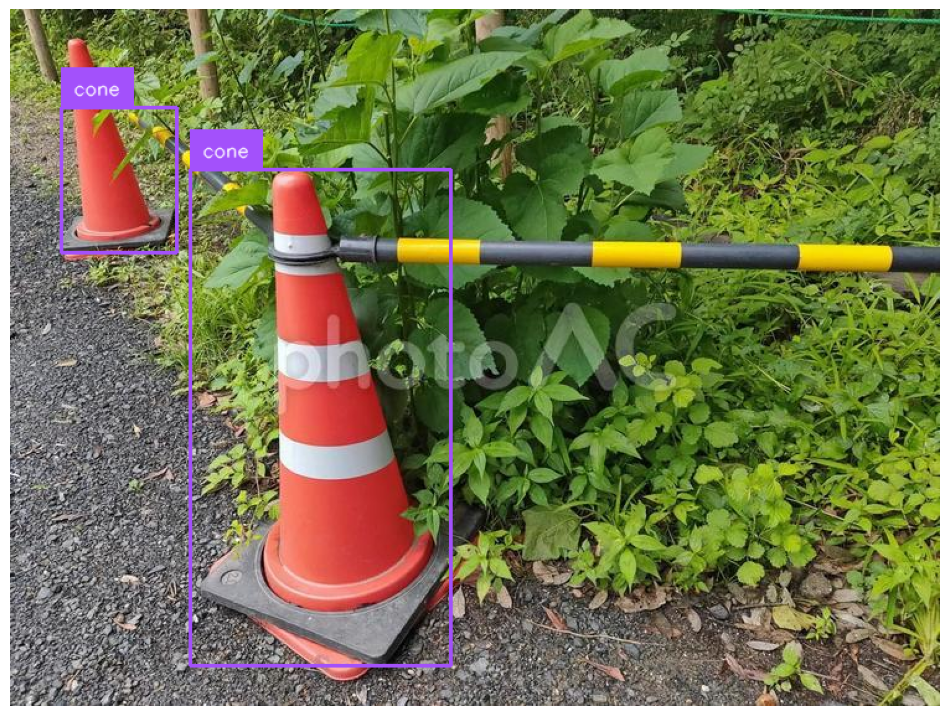

In [ ]:
import cv2
import supervision as sv

image = cv2.imread('cone.jpeg')
detections = sv.Detections.from_ultralytics(results)
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
!yolo export model=runs/detect/train2/weights/best.pt format=onnx opset=13 simplify

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
2024-06-04 03:49:24.592585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 03:49:24.592626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 03:49:24.593884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['onnx>=1.12.0', 'o

In [ ]:
!sudo apt-get -y update
!sudo apt-get -y install python3-pip
!sudo apt-get -y install python-is-python3
!wget https://github.com/PINTO0309/onnx2tf/releases/download/1.16.31/flatc.tar.gz \
  && tar -zxvf flatc.tar.gz \
  && sudo chmod +x flatc \
  && sudo mv flatc /usr/bin/
!pip install -U pip \
  && pip install tensorflow==2.16.1 \
  && pip install -U onnx==1.15.0 \
  && python -m pip install onnx_graphsurgeon \
        --index-url https://pypi.ngc.nvidia.com \
  && pip install -U onnxruntime==1.17.1 \
  && pip install -U onnxsim==0.4.33 \
  && pip install -U simple_onnx_processing_tools \
  && pip install -U onnx2tf \
  && pip install -U protobuf==3.20.3 \
  && pip install -U h5py==3.11.0 \
  && pip install -U psutil==5.9.5 \
  && pip install -U ml_dtypes==0.3.2 \
  && pip install -U tf-keras~=2.16 \
  && pip install flatbuffers>=23.5.26

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,085 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,129 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/univers

In [ ]:
# @title デフォルトのタイトル テキスト
!onnx2tf -i runs/detect/train2/weights/best.onnx -osd -cotof -oiqt -qt per-channel -o test


Model optimizing started ============================================================
Your model contains "Tile" ops or/and "ConstantOfShape" ops. Folding these ops can make the 
simplified model much larger. If it is not expected, please specify "--no-large-tensor" (which will 
lose some optimization chances)
Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃                ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Add            │ 11             │ 11               │
│ Cast           │ 1              │ 1                │
│ Concat         │ 21             │ 21               │
│ Constant       │ 187            │ 187              │
│ Conv           │ 83             │ 83               │
│ Flatten        │ 1              │ 1                │
│ GatherElements │ 3              │ 3                │
│ MatMul         │ 2              │ 2                │
│ MaxPool        │ 3              │

In [ ]:
!rm -r saved_model

In [ ]:
!cp runs/detect/train2/weights/best.onnx test